##Install Rendering dependancies, takes around 45 seconds



In [ ]:
#remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

## Gym Pacman Environment Dependancies

In [ ]:
#!apt-get update > /dev/null 2>&1
#!apt-get install cmake > /dev/null 2>&1
#!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

## Mount G-drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/Shareddrives/RL-project/Models/C51/

/content/drive/Shareddrives/RL-project/Models/C51


In [ ]:
!pwd
!ls

/content/drive/Shareddrives/RL-project/Models/C51
old


# Imports and Helper functions


In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [14]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
Ref: https://www.tensorflow.org/agents/tutorials/9_c51_tutorial
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video',video_callable=lambda episode_id: episode_id%2==0 , force=True)
  return env

# Pacman!

In [15]:
import random
from collections import deque
from IPython import display as ipythondisplay
from tensorflow.keras.layers import Dense, Input, Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model, load_model

In [16]:
# Make sure we have GPU available to train
print(tf.test.is_gpu_available())
print(tf.test.gpu_device_name())
!nvidia-smi

True
/device:GPU:0
Mon Nov 30 09:23:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    33W / 250W |    457MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                     

state_size:  128
action size:  9
episode: 0   score: 280.0   memory length: 1785   epsilon: -0.00189979999999818 loss:  71646.22832985861


episode: 1   score: 310.0   memory length: 4074   epsilon: -0.00189979999999818 loss:  11822245.13869863


episode: 2   score: 440.0   memory length: 5987   epsilon: -0.00189979999999818 loss:  79846595.13333334


episode: 3   score: 370.0   memory length: 7884   epsilon: -0.00189979999999818 loss:  238276458.13333333


episode: 4   score: 560.0   memory length: 10069   epsilon: -0.00189979999999818 loss:  504924832.92753625


episode: 5   score: 550.0   memory length: 12902   epsilon: -0.00189979999999818 loss:  1062307181.0109891


episode: 6   score: 190.0   memory length: 14311   epsilon: -0.00189979999999818 loss:  1892412615.4418604


episode: 7   score: 540.0   memory length: 16408   epsilon: -0.00189979999999818 loss:  2749170752.0


episode: 8   score: 370.0   memory length: 18473   epsilon: -0.00189979999999818 loss:  4212337671.876923


episode: 9   score: 550.0   memory length: 21338   epsilon: -0.00189979999999818 loss:  6351815028.869565


episode: 10   score: 490.0   memory length: 24219   epsilon: -0.00189979999999818 loss:  9678065498.838709


episode: 11   score: 370.0   memory length: 26380   epsilon: -0.00189979999999818 loss:  13969954756.637682


episode: 12   score: 250.0   memory length: 27989   epsilon: -0.00189979999999818 loss:  18161637294.08


episode: 13   score: 310.0   memory length: 29702   epsilon: -0.00189979999999818 loss:  22594315889.77778


episode: 14   score: 830.0   memory length: 32663   epsilon: -0.00189979999999818 loss:  28670115495.073685


episode: 15   score: 600.0   memory length: 35960   epsilon: -0.00189979999999818 loss:  40243079573.73585


episode: 16   score: 140.0   memory length: 37257   epsilon: -0.00189979999999818 loss:  49336211968.0


episode: 17   score: 260.0   memory length: 39226   epsilon: -0.00189979999999818 loss:  58922287434.32258


episode: 18   score: 210.0   memory length: 40875   epsilon: -0.00189979999999818 loss:  67964295208.15686


episode: 19   score: 220.0   memory length: 42812   epsilon: -0.00189979999999818 loss:  80507453708.59016


episode: 20   score: 300.0   memory length: 44877   epsilon: -0.00189979999999818 loss:  96256230258.21538


episode: 21   score: 170.0   memory length: 46654   epsilon: -0.00189979999999818 loss:  113964712082.28572


episode: 22   score: 1360.0   memory length: 49623   epsilon: -0.00189979999999818 loss:  135285383512.92632


episode: 23   score: 770.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  163517359167.43362


episode: 24   score: 370.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  191577441816.38095


episode: 25   score: 490.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  223260900075.68253


episode: 26   score: 340.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  244176745862.9818


episode: 27   score: 130.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  284855431863.5472


episode: 28   score: 410.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  318477515411.52545


episode: 29   score: 220.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  353182400202.8679


episode: 30   score: 510.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  392295020971.6044


episode: 31   score: 330.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  439837932032.0


episode: 32   score: 730.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  503615723370.14636


episode: 33   score: 690.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  579921278997.1134


episode: 34   score: 560.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  657309867401.8462


episode: 35   score: 430.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  745325121394.7587


episode: 36   score: 140.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  790400780060.4445


episode: 37   score: 450.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  870106382804.1143


episode: 38   score: 220.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  955086144658.2858


episode: 39   score: 260.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  1079299406779.7333


episode: 40   score: 470.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  1151871589544.1194


episode: 41   score: 480.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  1235071138890.203


episode: 42   score: 230.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  1343706322631.5933


episode: 43   score: 280.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  1446678019233.6843


episode: 44   score: 350.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  1535555106178.0984


episode: 45   score: 310.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  1665097847506.8235


episode: 46   score: 300.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  1810465591224.1404


episode: 47   score: 390.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  1971920672505.4358


episode: 48   score: 270.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  2202904283428.5713


episode: 49   score: 330.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  2333637187222.5884


episode: 50   score: 1040.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  2512351913959.906


episode: 51   score: 610.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  2784829095515.8975


episode: 52   score: 270.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  2796422415596.3076


episode: 53   score: 440.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  2984871306537.2905


episode: 54   score: 1040.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  3370808948559.012


episode: 55   score: 640.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  3586496921600.0


episode: 56   score: 1020.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  3935914011664.787


episode: 57   score: 520.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  4390207233566.1177


episode: 58   score: 630.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  4760174546561.707


episode: 59   score: 610.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  5008475697281.348


episode: 60   score: 190.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  5375391113364.945


episode: 61   score: 330.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  5423221711542.237


episode: 62   score: 520.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  5840430096583.805


episode: 63   score: 340.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  6391499972608.0


episode: 64   score: 540.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  6662214492736.901


episode: 65   score: 330.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  7086084044507.429


episode: 66   score: 490.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  7428954468779.94


episode: 67   score: 1400.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  7712787348151.192


episode: 68   score: 520.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  8091239841792.0


episode: 69   score: 320.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  8413435030966.857


episode: 70   score: 450.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  8931083249254.4


episode: 71   score: 480.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  9613784239308.8


episode: 72   score: 410.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  10150989476659.2


episode: 73   score: 750.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  10776659762903.904


episode: 74   score: 370.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  11179288488331.229


episode: 75   score: 450.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  11568104532154.182


episode: 76   score: 1220.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  12574166691864.824


episode: 77   score: 580.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  13655878283209.387


episode: 78   score: 350.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  14023716918949.416


episode: 79   score: 300.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  15261944221240.889


episode: 80   score: 250.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  15956178604816.34


episode: 81   score: 300.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  16231828662542.49


episode: 82   score: 340.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  17394676913181.258


episode: 83   score: 780.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  18006483891615.137


episode: 84   score: 290.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  19064929175419.01


episode: 85   score: 330.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  19882444050236.953


episode: 86   score: 280.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  20980193536058.516


episode: 87   score: 630.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  20366304858484.363


episode: 88   score: 320.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  23032940390586.184


episode: 89   score: 270.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  23315503511216.87


episode: 90   score: 440.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  24886330210970.22


episode: 91   score: 640.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  25710644631214.99


episode: 92   score: 600.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  26891118444544.0


episode: 93   score: 370.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  28669482644965.05


episode: 94   score: 490.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  29319850442483.41


episode: 95   score: 430.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  30999916664149.332


episode: 96   score: 620.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  31955251901401.113


episode: 97   score: 400.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  32549197366833.547


episode: 98   score: 1360.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  34566772746685.22


episode: 99   score: 290.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  37838304279518.97


episode: 100   score: 800.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  39540484547730.29


episode: 101   score: 390.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  40857482856011.54


episode: 102   score: 240.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  42214890304240.33


episode: 103   score: 190.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  43604961314439.836


episode: 104   score: 400.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  43883093249513.74


episode: 105   score: 330.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  44338390495736.984


episode: 106   score: 190.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  47794320111042.56


episode: 107   score: 510.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  49536036629517.3


episode: 108   score: 310.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  53013098042610.04


episode: 109   score: 540.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  53574576257251.555


episode: 110   score: 1030.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  56702337856692.7


episode: 111   score: 350.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  58701313081344.0


episode: 112   score: 370.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  60380235694080.0


episode: 113   score: 280.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  61733650464149.734


episode: 114   score: 460.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  61642665673484.19


episode: 115   score: 310.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  63606860880153.1


episode: 116   score: 690.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  68334364765350.695


episode: 117   score: 370.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  70517938087526.4


episode: 118   score: 220.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  74200091932721.95


episode: 119   score: 780.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  74769972245220.23


episode: 120   score: 380.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  75621633350985.77


episode: 121   score: 270.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  81087459641636.58


episode: 122   score: 680.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  83353909364872.53


episode: 123   score: 200.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  86260865313013.77


episode: 124   score: 560.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  88413187342336.0


episode: 125   score: 400.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  90965515558365.86


episode: 126   score: 260.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  95799912174821.88


episode: 127   score: 270.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  98116132180553.14


episode: 128   score: 80.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  98982051399732.52


episode: 129   score: 240.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  101381311789679.3


episode: 130   score: 380.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  103794299329909.84


episode: 131   score: 360.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  108526109895338.67


episode: 132   score: 270.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  111935609388092.23


episode: 133   score: 990.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  115552078865925.06


episode: 134   score: 280.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  118168251048096.62


episode: 135   score: 220.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  123677267751367.11


episode: 136   score: 220.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  122727703240301.11


episode: 137   score: 300.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  133174389112832.0


episode: 138   score: 1120.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  132352638661427.2


episode: 139   score: 250.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  136827454764094.69


episode: 140   score: 310.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  141745067245270.1


episode: 141   score: 160.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  147329953763087.06


episode: 142   score: 810.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  145994954423899.9


episode: 143   score: 180.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  152538543959691.62


episode: 144   score: 400.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  158753376060104.34


episode: 145   score: 240.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  162021123128701.5


episode: 146   score: 430.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  164902509477888.0


episode: 147   score: 290.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  169882213069023.4


episode: 148   score: 220.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  170065634437802.66


episode: 149   score: 120.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  182272022351225.25


episode: 150   score: 320.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  179673388947553.53


episode: 151   score: 230.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  195738191208031.47


episode: 152   score: 300.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  200211925917978.47


episode: 153   score: 350.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  201107055802804.47


episode: 154   score: 1090.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  203314865342830.47


episode: 155   score: 240.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  204270450313282.06


episode: 156   score: 190.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  210403645813853.1


episode: 157   score: 390.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  212531723629049.0


episode: 158   score: 530.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  217395124518709.72


episode: 159   score: 160.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  220538196422070.84


episode: 160   score: 880.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  236946306153006.53


episode: 161   score: 370.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  232654299635577.72


episode: 162   score: 100.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  238735965605068.8


episode: 163   score: 330.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  236267565631780.56


episode: 164   score: 200.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  257047371353948.16


episode: 165   score: 410.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  253532970083716.4


episode: 166   score: 410.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  260621709404932.2


episode: 167   score: 810.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  265107801076418.22


episode: 168   score: 280.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  273648340015513.6


episode: 169   score: 800.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  266664954298368.0


episode: 170   score: 230.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  281294822366061.72


episode: 171   score: 320.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  282692607901140.6


episode: 172   score: 300.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  297944862787323.4


episode: 173   score: 860.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  302636701514095.56


episode: 174   score: 590.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  295790450268658.2


episode: 175   score: 410.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  310610969355985.8


episode: 176   score: 380.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  313839830226424.4


episode: 177   score: 830.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  311396326524078.8


episode: 178   score: 200.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  319208083193187.25


episode: 179   score: 120.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  323922331230407.8


episode: 180   score: 200.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  341892897779973.44


episode: 181   score: 1220.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  340758110258295.06


episode: 182   score: 430.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  356341004321374.8


episode: 183   score: 1130.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  363959745596773.2


episode: 184   score: 280.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  365674443647925.06


episode: 185   score: 220.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  381894618493243.06


episode: 186   score: 340.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  394431902631708.44


episode: 187   score: 1050.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  404350047416560.94


episode: 188   score: 460.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  407176876519775.06


episode: 189   score: 240.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  406257441014297.2


episode: 190   score: 260.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  413933657434142.56


episode: 191   score: 350.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  408032336069172.94


episode: 192   score: 330.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  428676589631053.56


episode: 193   score: 70.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  442894917828608.0


episode: 194   score: 810.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  451775903823600.1


episode: 195   score: 150.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  455620608466616.3


episode: 196   score: 930.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  460137526921789.44


episode: 197   score: 550.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  474519974624417.7


episode: 198   score: 340.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  486038494993781.8


episode: 199   score: 1210.0   memory length: 50000   epsilon: -0.00189979999999818 loss:  509391042316354.06


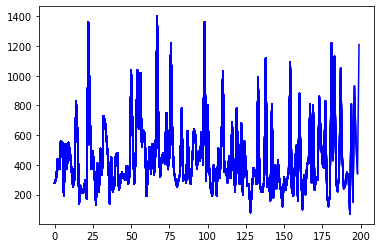

In [17]:
# TODO: allow passing of hyper params as a colab form (nice UI)
EPISODES   = 200
load_model = False # TODO: Set up proper saving and loading of model checkpoints

class C51Agent:
    def __init__(self, state_size, action_size, num_atoms=51):
        self.state_size = state_size 
        self.action_size = action_size
        
        self. gamma = 0.99
        self.learning_rate = 0.0001
        self.epsilon = 1.0 # Initial exploration vs. exploitation value
        self.initial_epsilon = 1.0
        self.final_epsilon = 0.0001
        self.batch_size = 32
        self.observe = 100
        self.explore = 500
        self.timestep_per_train = 30
        self.update_target_freq = 50

        # C51 Specific Params
        self.num_atoms = num_atoms # 51 for C51. This is # of distribution intervals
        self.v_max = 30            # TODO: Update me
        self.v_min = -10           # TODO: Update me
        self.delta_z = (self.v_max - self.v_min) / float(self.num_atoms - 1) # TODO: Update me
        self.z = [self.v_min + i * self.delta_z for i in range(self.num_atoms)] # TODO: Update me

        # create main replay memory for the agent using deque
        self.memory = deque(maxlen=50000)

        # create main model
        self.model = self.build_model(input_shape=self.state_size, num_atoms=self.num_atoms, action_size=self.action_size, learning_rate=self.learning_rate)
        self.target_model = self.build_model(input_shape=self.state_size, num_atoms=self.num_atoms, action_size=self.action_size, learning_rate=self.learning_rate)

        #Loading weights if load_model=True
        if load_model:
            self.model.load_weights("./pacman-c51.h5")

    def build_model(self, input_shape, num_atoms, action_size, learning_rate):
        '''
        Description: 
        Arguments: 

        Return: 
        '''
        state_input = Input(shape=(input_shape))
        dense = Dense(1024, activation='relu')(state_input)
        dense = Dense(512, activation='relu')(dense)
        dense = Dense(256, activation='relu')(dense)
        dense = Dense(128, activation='relu')(dense)

        distribution_list = []
        for i in range(action_size):
            distribution_list.append(Dense(num_atoms, activation='softmax')(dense))

        model = Model(inputs=state_input, outputs=distribution_list)
        adam = Adam(lr=learning_rate)
        model.compile(loss='categorical_crossentropy', optimizer=adam)

        return model
    
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    def get_action(self, state):
        '''
        Description: Exploit with epsilon probability, otherwise sample an optimal 
        distribution interval.

        Arguments: 

        Retval: 
        '''
        action_idx = None
        if np.random.rand() <= self.epsilon:
            action_idx = random.randrange(self.action_size)
          #print("rand action")
        else:
            action_idx = self.get_optimal_action(state)
          #print("pred action")
        return action_idx
        

    def get_optimal_action(self, state):
        '''
        Description: 

        Arguments: 

        Retval: 
        '''
        z = self.model.predict(state)

        z_concat = np.vstack(z)
        q = np.sum(np.multiply(z_concat, np.array(self.z)), axis=1)

        # Pick action with biggest Q value
        action_idx = np.argmax(q)

        return action_idx

    # save sample <state,action,reward,nest_state> to the replay memory
    def add_to_memory(self, state, action, reward, next_state, done, t):
        '''
        Description: 

        Arguments: 

        Retval: 
        '''
        self.memory.append((state, action, reward, next_state, done))
        if self.epsilon > self.final_epsilon and t > self.observe:
            self.epsilon -= (self.initial_epsilon - self.final_epsilon) / self.explore
        
        if t % self.update_target_freq == 0:
            self.update_target_model()


    def train_model(self):
        '''
        Description: 

        Arguments: 

        Retval: 
        '''
        #print("Training Model")
        num_samples = min(self.batch_size * self.timestep_per_train, len(self.memory))
        replay_samples = random.sample(self.memory, num_samples)

        state_inputs = np.zeros((num_samples, self.state_size)) # ((num_samples,) + self.state_size)
        next_states = np.zeros((num_samples, self.state_size))
        m_prob = [np.zeros((num_samples, self.num_atoms)) for i in range(self.action_size)]
        action, reward, done = [], [], []

        for i in range(num_samples):
            state_inputs[i] = replay_samples[i][0]
            action.append(replay_samples[i][1])
            reward.append(replay_samples[i][2])
            next_states[i] = replay_samples[i][3]
            done.append(replay_samples[i][4])
        
        # Get target state and expected value 
        z = self.model.predict(next_states)
        z_ = self.target_model.predict(next_states)

        # ----- C51 ----
        # Get optimal actions for the next states (from distribution z)
        optimal_action_idxs = []
        z_concat = np.vstack(z)
        q = np.sum(np.multiply(z_concat, np.array(self.z)), axis=1) # length (num_atoms * num_actions)
        q = q.reshape((num_samples, action_size), order='F')
        optimal_action_idxs = np.argmax(q, axis=1)

        for i in range(num_samples): # TODO: should this be the local batch_size or global self.batch_size var?
            if done[i]: # terminal state
                # Distribution collapses to single point
                Tz = min(self.v_max, max(self.v_min, reward[i]))
                bj = (Tz - self.v_min) / self.delta_z
                m_l, m_u = math.floor(bj), math.ceil(bj)
                m_prob[action[i]][i][int(m_l)] += (m_u - bj)
                m_prob[action[i]][i][int(m_u)] += (bj - m_l)
                #target[i][action[i]] = reward[i]
            else:
                for j in range(self.num_atoms):
                    Tz = min(self.v_max, max(self.v_min, reward[i] + self.gamma * self.z[j]))
                    bj = (Tz - self.v_min) / self.delta_z
                    m_l, m_u = math.floor(bj), math.ceil(bj)
                    m_prob[action[i]][i][int(m_l)] += z_[optimal_action_idxs[i]][i][j] * (m_u - bj)
                    m_prob[action[i]][i][int(m_u)] += z_[optimal_action_idxs[i]][i][j] * (bj - m_l)

        # and do the model fit!
        loss = self.model.fit(state_inputs, m_prob, batch_size=self.batch_size, epochs=1, verbose=0)
        
        return loss.history['loss']

        # load the saved model
    def load_model(self, name):
        self.model.load_weights(name)

    # save the model which is under training
    def save_model(self, name):
        self.model.save_weights(name)


if __name__ == '__main__':
    env = wrap_env(gym.make('MsPacman-ramNoFrameskip-v4'))
    env.reset()
    # get size of state and action from environment
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    print("state_size: ", state_size)
    print("action size: ", action_size)
    agent = C51Agent(state_size, action_size)

    scores, episodes = [], []

    for e in range(EPISODES):
        done = False
        score = 0
        state = env.reset()
        state = np.reshape(state, [1, state_size])
        lives = 3
        t = 0
        loss_tot = np.array([])
        while not done:
            loss = 0
            # get action for the current state and go one step in environment
            action = agent.get_action(state)
            #print(action)
            next_state, reward, done, info = env.step(action)
            
            dead = info['ale.lives']<lives
            lives = info['ale.lives']
            #print("Reward: ", reward)
            #print("Lives: ", info['ale.lives'])
            #print("Dead: ", dead)
            #print("Score: ", score)
            # When Pacman dies gives penalty of -100
            reward = reward if not dead else -20
            score += reward
            
            next_state = np.reshape(next_state, [1, state_size])
            # save the sample <s, a, r, s'> to the replay memory
            agent.add_to_memory(state, action, score, next_state, done, t)
            # every time step do the training
            if t > agent.observe and t % agent.timestep_per_train == 0:
                loss = agent.train_model()
                loss_tot = np.append(loss_tot, loss)
            
            state = next_state
            t+=1
            
            if done:
                scores.append(score)
                episodes.append(e)
                pylab.plot(episodes, scores, 'b')
                pylab.savefig( "pacmanTest.png")
                print("episode:", e, "  score:", score, "  memory length:",
                         len(agent.memory), "  epsilon:", agent.epsilon, "loss: ", np.average(loss_tot))
                show_video()
                #score_logger.add_score(step, run)
     
        if (e % 10 == 0) & (load_model==False):
            agent.model.save_weights("pacman-c51-" + str(e) + ".h5")

In [18]:
agent.model.save_weights("pacman-c51-final.h5")